<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span><ul class="toc-item"><li><span><a href="#Data-Visualization" data-toc-modified-id="Data-Visualization-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Data Visualization</a></span></li><li><span><a href="#Stationary-Series" data-toc-modified-id="Stationary-Series-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Stationary Series</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Rolling-statistic-Method" data-toc-modified-id="Rolling-statistic-Method-1.2.0.1"><span class="toc-item-num">1.2.0.1&nbsp;&nbsp;</span>Rolling statistic Method</a></span></li><li><span><a href="#Augmented-Dickey-fuller-test" data-toc-modified-id="Augmented-Dickey-fuller-test-1.2.0.2"><span class="toc-item-num">1.2.0.2&nbsp;&nbsp;</span>Augmented Dickey-fuller test</a></span></li><li><span><a href="#Kwiatkowski–Phillips–Schmidt–Shin-(KPSS)-test" data-toc-modified-id="Kwiatkowski–Phillips–Schmidt–Shin-(KPSS)-test-1.2.0.3"><span class="toc-item-num">1.2.0.3&nbsp;&nbsp;</span>Kwiatkowski–Phillips–Schmidt–Shin (KPSS) test</a></span></li></ul></li><li><span><a href="#Make-the-Time-Series-Data-Stationary" data-toc-modified-id="Make-the-Time-Series-Data-Stationary-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Make the Time Series Data Stationary</a></span></li></ul></li></ul></li><li><span><a href="#Arima-Model" data-toc-modified-id="Arima-Model-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Arima Model</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Model-Order-Selection" data-toc-modified-id="Model-Order-Selection-2.0.1"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>Model Order Selection</a></span><ul class="toc-item"><li><span><a href="#Chosing-the-model-order-with-ACF-(Autocorrelation-Function)-and-PACF-(Partial-Autocorrelation-Function)" data-toc-modified-id="Chosing-the-model-order-with-ACF-(Autocorrelation-Function)-and-PACF-(Partial-Autocorrelation-Function)-2.0.1.1"><span class="toc-item-num">2.0.1.1&nbsp;&nbsp;</span>Chosing the model order with ACF (Autocorrelation Function) and PACF (Partial Autocorrelation Function)</a></span></li><li><span><a href="#Chosing-the-model-order-using-the-auto_arima-function" data-toc-modified-id="Chosing-the-model-order-using-the-auto_arima-function-2.0.1.2"><span class="toc-item-num">2.0.1.2&nbsp;&nbsp;</span>Chosing the model order using the auto_arima function</a></span></li></ul></li><li><span><a href="#Train-Test-split" data-toc-modified-id="Train-Test-split-2.0.2"><span class="toc-item-num">2.0.2&nbsp;&nbsp;</span>Train-Test split</a></span></li></ul></li></ul></li><li><span><a href="#Sarima-Model" data-toc-modified-id="Sarima-Model-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Sarima Model</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Model-order-selection" data-toc-modified-id="Model-order-selection-3.0.1"><span class="toc-item-num">3.0.1&nbsp;&nbsp;</span>Model order selection</a></span><ul class="toc-item"><li><span><a href="#Using-pm.auto_arima" data-toc-modified-id="Using-pm.auto_arima-3.0.1.1"><span class="toc-item-num">3.0.1.1&nbsp;&nbsp;</span>Using pm.auto_arima</a></span></li></ul></li><li><span><a href="#Model-Diagnostics" data-toc-modified-id="Model-Diagnostics-3.0.2"><span class="toc-item-num">3.0.2&nbsp;&nbsp;</span>Model Diagnostics</a></span></li><li><span><a href="#Model-Forecast" data-toc-modified-id="Model-Forecast-3.0.3"><span class="toc-item-num">3.0.3&nbsp;&nbsp;</span>Model Forecast</a></span></li><li><span><a href="#Model-Accuracy-metrics" data-toc-modified-id="Model-Accuracy-metrics-3.0.4"><span class="toc-item-num">3.0.4&nbsp;&nbsp;</span>Model Accuracy metrics</a></span></li><li><span><a href="#Using-Sarima-to-Forecast-2-Years-Out" data-toc-modified-id="Using-Sarima-to-Forecast-2-Years-Out-3.0.5"><span class="toc-item-num">3.0.5&nbsp;&nbsp;</span>Using Sarima to Forecast 2 Years Out</a></span></li></ul></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

In [80]:
import pandas as pd
import yfinance as yf
from yahoofinancials import YahooFinancials
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from pandas import DataFrame
import itertools
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10

from math import sqrt
from sklearn.metrics import mean_squared_error, make_scorer, mean_absolute_error

# Analysis imports
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima.arima import auto_arima
from fbprophet import Prophet
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf


import warnings
warnings.filterwarnings('ignore') #this would remove any deprecated warning

# Exploratory Data Analysis

In [242]:
sil_df = pd.read_csv(r'C:\Users\avel8\OneDrive\Documents\SPRINGBOARD\silver.csv',
                 usecols=['Date', 'Close*'], parse_dates=['Date'],index_col='Date')
sil_df.sort_index(inplace=True)
sil_df.head()

,Close*
Date,
2010-11-22,26.695
2010-11-29,29.241
2010-12-06,28.576
2010-12-13,29.113
2010-12-20,29.310


In [3]:
print (sil_df.describe())
print ("=============================================================")
print (sil_df.dtypes)

           Close*
count  575.000000
mean    21.552443
std      6.914742
min     12.349000
25%     16.351500
50%     18.489000
75%     26.307000
max     48.584000
Close*    float64
dtype: object


In [3]:
sil_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 575 entries, 2010-11-22 to 2021-11-22
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close*  575 non-null    float64
dtypes: float64(1)
memory usage: 9.0 KB


In [4]:
sil_df.isnull().values.any()

False

In [5]:
print("Min:",sil_df.index.min())
print("Max:",sil_df.index.max())

Min: 2010-11-22 00:00:00
Max: 2021-11-22 00:00:00


## Data Visualization

<Figure size 1224x360 with 0 Axes>

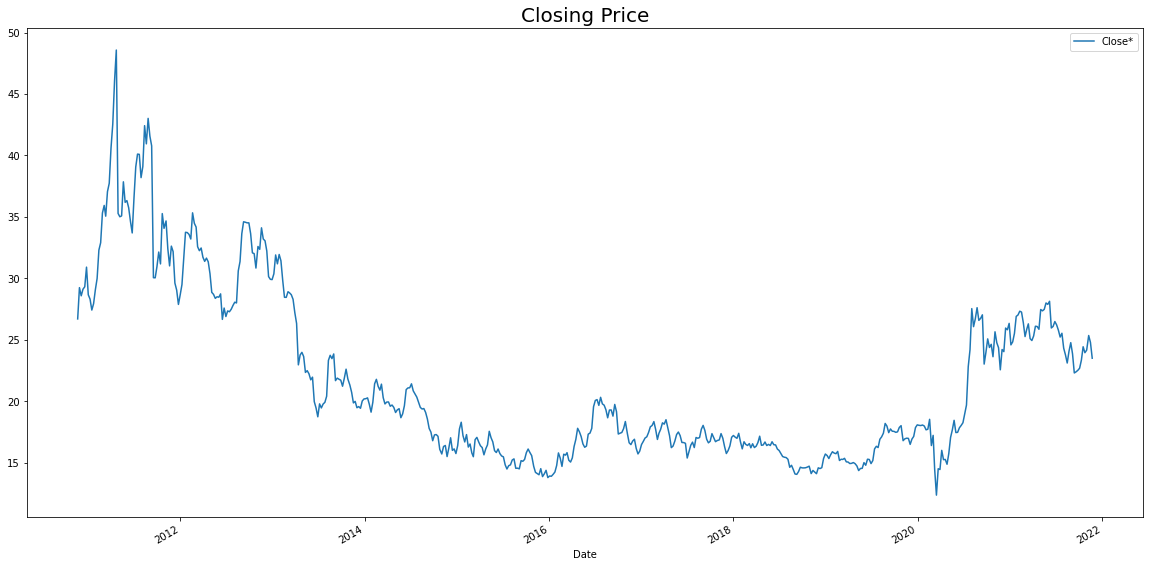

In [7]:
plt.figure(figsize=(17,5))
sil_df.plot()
plt.title("Closing Price",fontsize=20)
plt.show()

<AxesSubplot:ylabel='Density'>

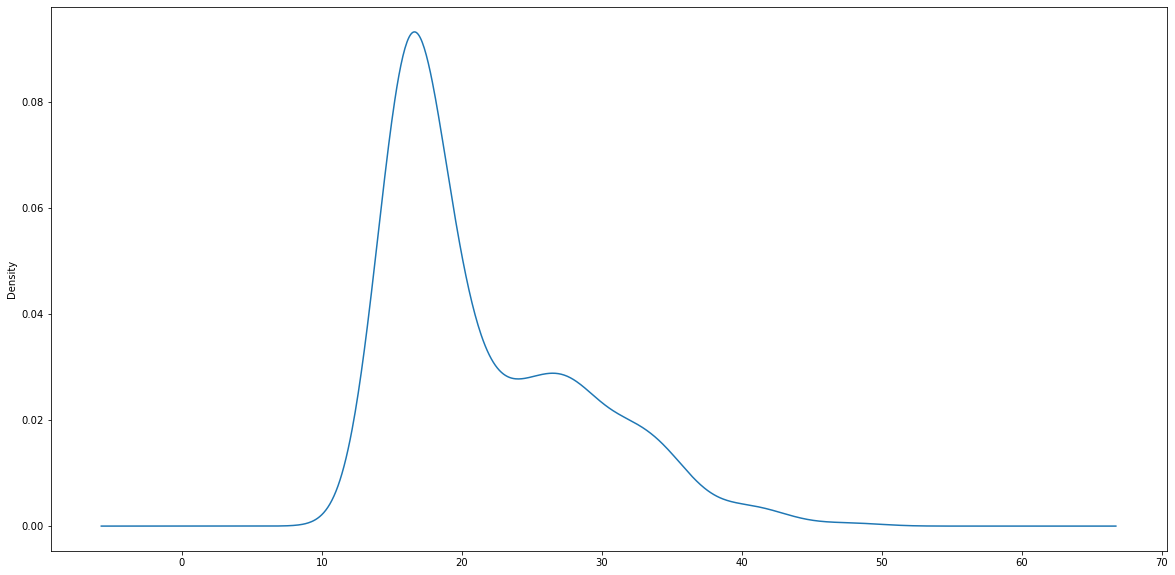

In [8]:
# probability distribution to visualize the data in our series
#Distribution of the dataset
df_close = sil_df['Close*']
df_close.plot(kind='kde')


## Stationary Series

A time series is also regarded to include three systematic components: level, trend, and seasonality, as well as one non-systematic component termed noise.

The following are the components’ definitions:
The average value in the series is called the level.
The increasing or falling value in the series is referred to as the trend.
Seasonality is the series’ recurring short-term cycle.
The random variance in the series is referred to as noise.
Because time series analysis only works with stationary data, we must first determine whether a series is stationary.

In [6]:
y = sil_df['Close*']

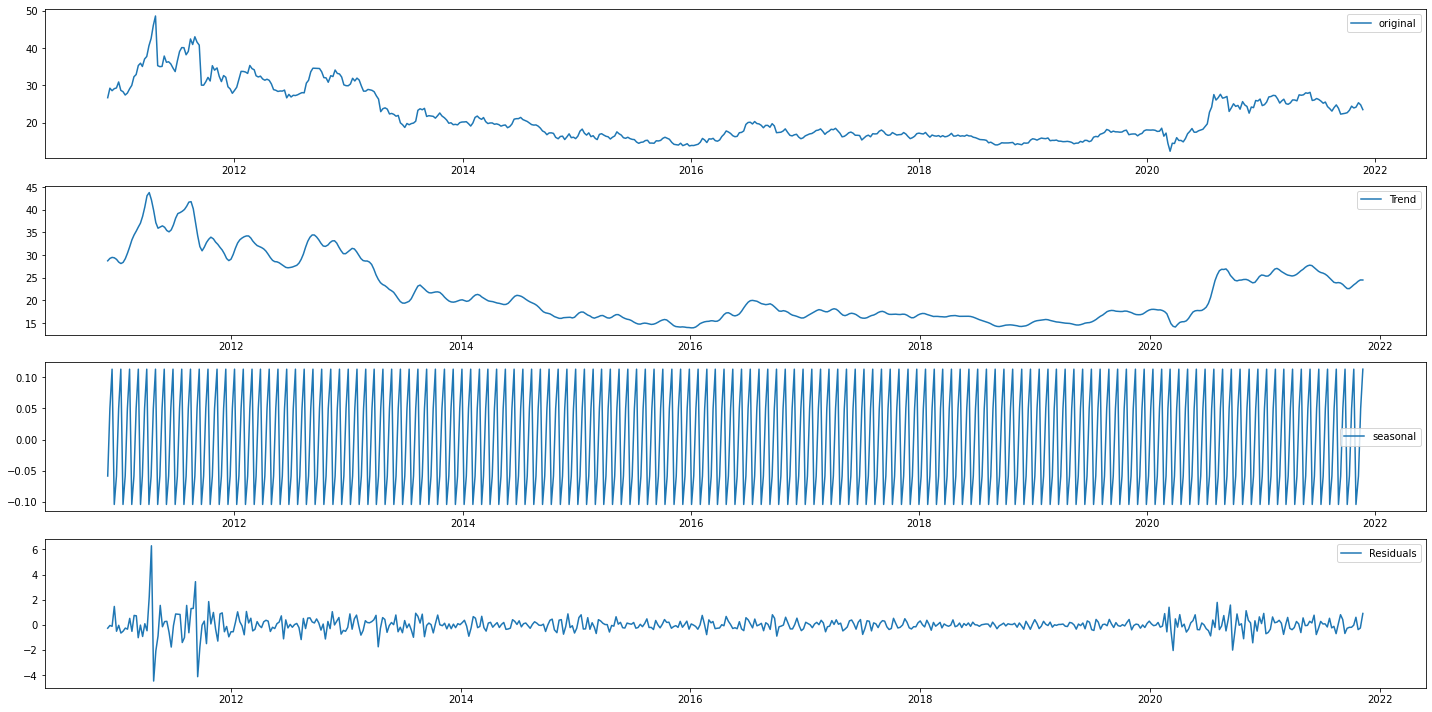

In [7]:
#To separate the trend and the seasonality from a time series, 
# we can decompose the series using the following code.
# Import seasonal_decompose 
from statsmodels.tsa.seasonal import seasonal_decompose

# Make a variable called decomposition, and assign it y passed to seasonal_decompose() 
decomposition = seasonal_decompose(sil_df['Close*'], model='additive', period=4)

# Make three variables for trend, seasonal and residual components respectively. 
# Assign them the relevant features of decomposition 
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot the original data, the trend, the seasonality, and the residuals 
plt.subplot(411)
plt.plot(y, label = 'original')
plt.legend(loc = 'best')
plt.subplot(412)
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')
plt.subplot(413)
plt.plot(seasonal, label = 'seasonal')
plt.legend(loc = 'best')
plt.subplot(414)
plt.plot(residual, label = 'Residuals')
plt.legend(loc = 'best')
plt.tight_layout()


There are three methods in python to check data stationarity:-
1) Rolling statistics:tics and Augmented Dickey – fuller test.
This method gave a visual representation of the data to define its stationarity. A Moving variance or moving average graph is plot and then it is observed whether it varies with time or not. In this method, a moving window of time is taken (based on our needs, for eg-10, 12, etc.) and then the mean of that time period is calculated as the current value.
 
2) Augmented Dickey- fuller Test (ADCF)

ADF (Augmented Dickey-Fuller) Test
One of the most widely used statistical tests is the Dickey-Fuller test. It can be used to determine whether or not a series has a unit root, and thus whether or not the series is stationary. This test’s null and alternate hypotheses are:

Null Hypothesis: The series has a unit root (value of a =1)

Alternate Hypothesis: The series has no unit root.

If the null hypothesis is not rejected, the series is said to be non-stationary. The series can be linear or difference stationary as a result of this.

The series becomes stationary if both the mean and standard deviation are flat lines (constant mean and constant variance).
3) KPSS Test :- The Kwiatkowski–Phillips–Schmidt–Shin (KPSS) test informs if a time series is stationary around a mean or linear trend, or is non-stationary due to a unit root.
It is highly recommended that KPSS and ADF Test are used for testing stationarity in the data. Hence, the following aspects might arise if using both the tests :-
1. ADF and KPSS Test conclude that series is not stationary.
2. ADF and KPSS Test conclude that series is stationary.
3. ADF informs that series is stationary and KPSS informs that series is non stationary.
4. ADF informs that series is non stationary and KPSS informs that series is stationary.

#### Rolling statistic Method

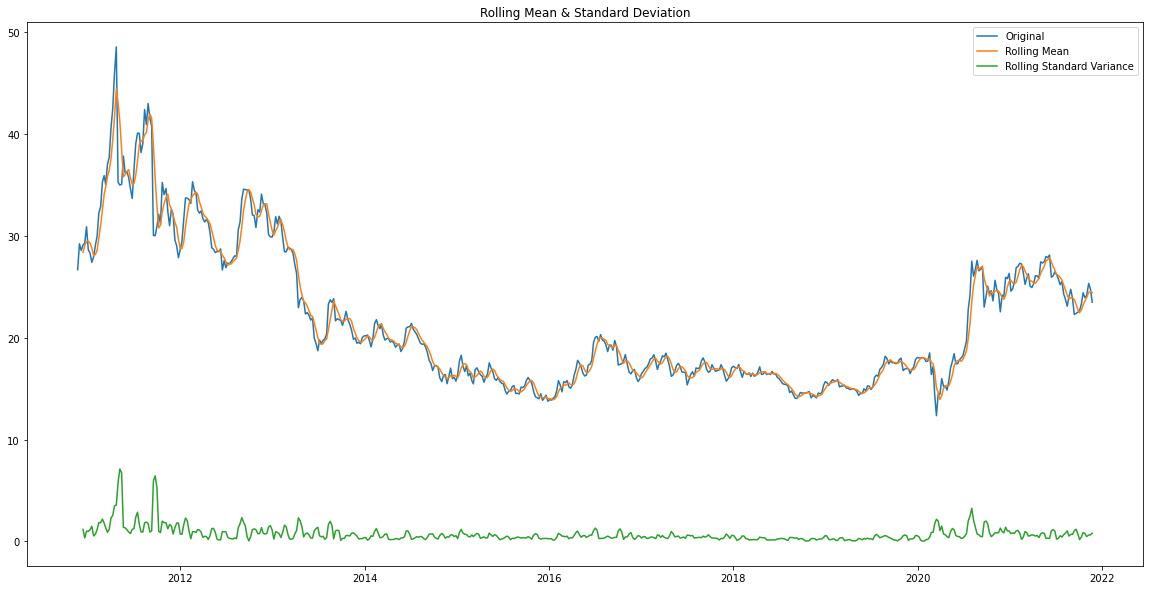

In [14]:
# Let's plot the 12-Month Moving Rolling Mean & Variance and find Insights
# Rolling Statistics
rolmean_4 = sil_df.rolling(window=4).mean()
rolvar_4 = sil_df.rolling(window=4).std()

plt.plot(sil_df, label='Original')
plt.plot(rolmean_4, label='Rolling Mean')
plt.plot(rolvar_4, label='Rolling Standard Variance')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

__Observation__
the graph of rolling mean and rolling standard deviation is not constant, this shows that our  dataset is not stationary 

#### Augmented Dickey-fuller test

In [15]:
# Dickey Fuller Test Function
def test_stationarity(timeseries):
    # Perform Dickey-Fuller test:
    from statsmodels.tsa.stattools import adfuller
    print('Results of Dickey-Fuller Test:')
    print ("==============================================")
    
    dftest = adfuller(timeseries, autolag='AIC')
    
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags Used', 'Number of Observations Used'])
    
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    
    print(dfoutput)

In [16]:
# Stationarity Check - Lets do a quick check on Stationarity with Dickey Fuller Test 
# Convert the DF to series first
ts = sil_df['Close*']
test_stationarity(ts)

Results of Dickey-Fuller Test:
Test Statistic                  -1.662797
p-value                          0.450375
#lags Used                      10.000000
Number of Observations Used    564.000000
Critical Value (1%)             -3.441998
Critical Value (5%)             -2.866678
Critical Value (10%)            -2.569506
dtype: float64


In [17]:
adfuller_result = adfuller(sil_df['Close*'])
print('ADF Statistic: ', adfuller_result[0])
print('p-value: ', adfuller_result[1])

ADF Statistic:  -1.662797405074607
p-value:  0.4503750479732333


__Observation__

The test statistic is (-1.67) . The more negative the more likely to be stationary
The p- value of 0.45

The obtained p-value is greater than significance level of 0.05 and the ADF statistic is higher than any of the critical values. Clearly, there is no reason to reject the null hypothesis. So, the time series is in fact non-stationary.

#### Kwiatkowski–Phillips–Schmidt–Shin (KPSS) test

In [18]:
from statsmodels.tsa.stattools import kpss
kpss(sil_df['Close*'])

(1.501885058849266,
 0.01,
 16,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

__Observation__
Since our p-value is less than 0.05, we should reject the Null hypothesis and deduce the non-stationarity of our data.
This is confirmed in all three test

### Make the Time Series Data Stationary

To make the data stationary three methods tested
The difference method 
This is where from each value in our time series we substract the previous

The square root 

Difference twice method to see which is a best way to make the data stationary

In [8]:
# Diff Method
sil_diff = sil_df.diff().dropna()
diff_adfuller_result = adfuller(sil_diff['Close*'])
print('Difference Method ADF Statistic: ', diff_adfuller_result[0])
print('Difference Method p-value: ', diff_adfuller_result[1])

Difference Method ADF Statistic:  -6.47323160847996
Difference Method p-value:  1.350838372863357e-08


In [9]:
# Squared root
sil_sqrt = np.sqrt(sil_df).dropna()
sqrt_adfuller_result = adfuller(sil_sqrt['Close*'])
print('Square Root Method ADF Statistic: ', sqrt_adfuller_result[0])
print('Square Root Methodp-value: ', sqrt_adfuller_result[1])

Square Root Method ADF Statistic:  -1.830260801413037
Square Root Methodp-value:  0.3655448753214434


In [10]:
# Diff Twice Method
sil_difftwice = sil_df.diff().diff().dropna()
difftwice_adfuller_result = adfuller(sil_difftwice['Close*'])
print('Difference Method ADF Statistic: ', difftwice_adfuller_result[0])
print('Difference Method p-value: ', difftwice_adfuller_result[1])

Difference Method ADF Statistic:  -11.566184537868375
Difference Method p-value:  3.1822236594140305e-21


__Observation__

The Square Root methods didn't produce a p-value less than 0.05. So we should eliminate it. Both Differencing once and twice methods produced a p-value less than 0.05 but Differencing Twice produced a much more negative ADF Statistic. That's what we want, the more negative the better.

# Arima Model

ARIMA, short for ‘Auto Regressive Integrated Moving Average’ is actually a class of models that ‘explains’ a given time series based on its own past values, that is, its own lags and the lagged forecast errors, so that equation can be used to forecast future values
Any ‘non-seasonal’ time series that exhibits patterns and is not a random white noise can be modeled with ARIMA models.
An ARIMA model is characterized by 3 terms: p, d, q
where,
p is the order of the AR term
q is the order of the MA term
d is the number of differencing required to make the time series stationary

### Model Order Selection

#### Chosing the model order with ACF (Autocorrelation Function) and PACF (Partial Autocorrelation Function)
__d__ is the minimum number of differencing needed

__p__ is the order of the ‘Auto Regressive’ (AR) term. It refers to the number of lags of Y to be used as predictors

__q__ is the order of the ‘Moving Average’ (MA) term. It refers to the number of lagged forecast errors that should go into the ARIMA Model.

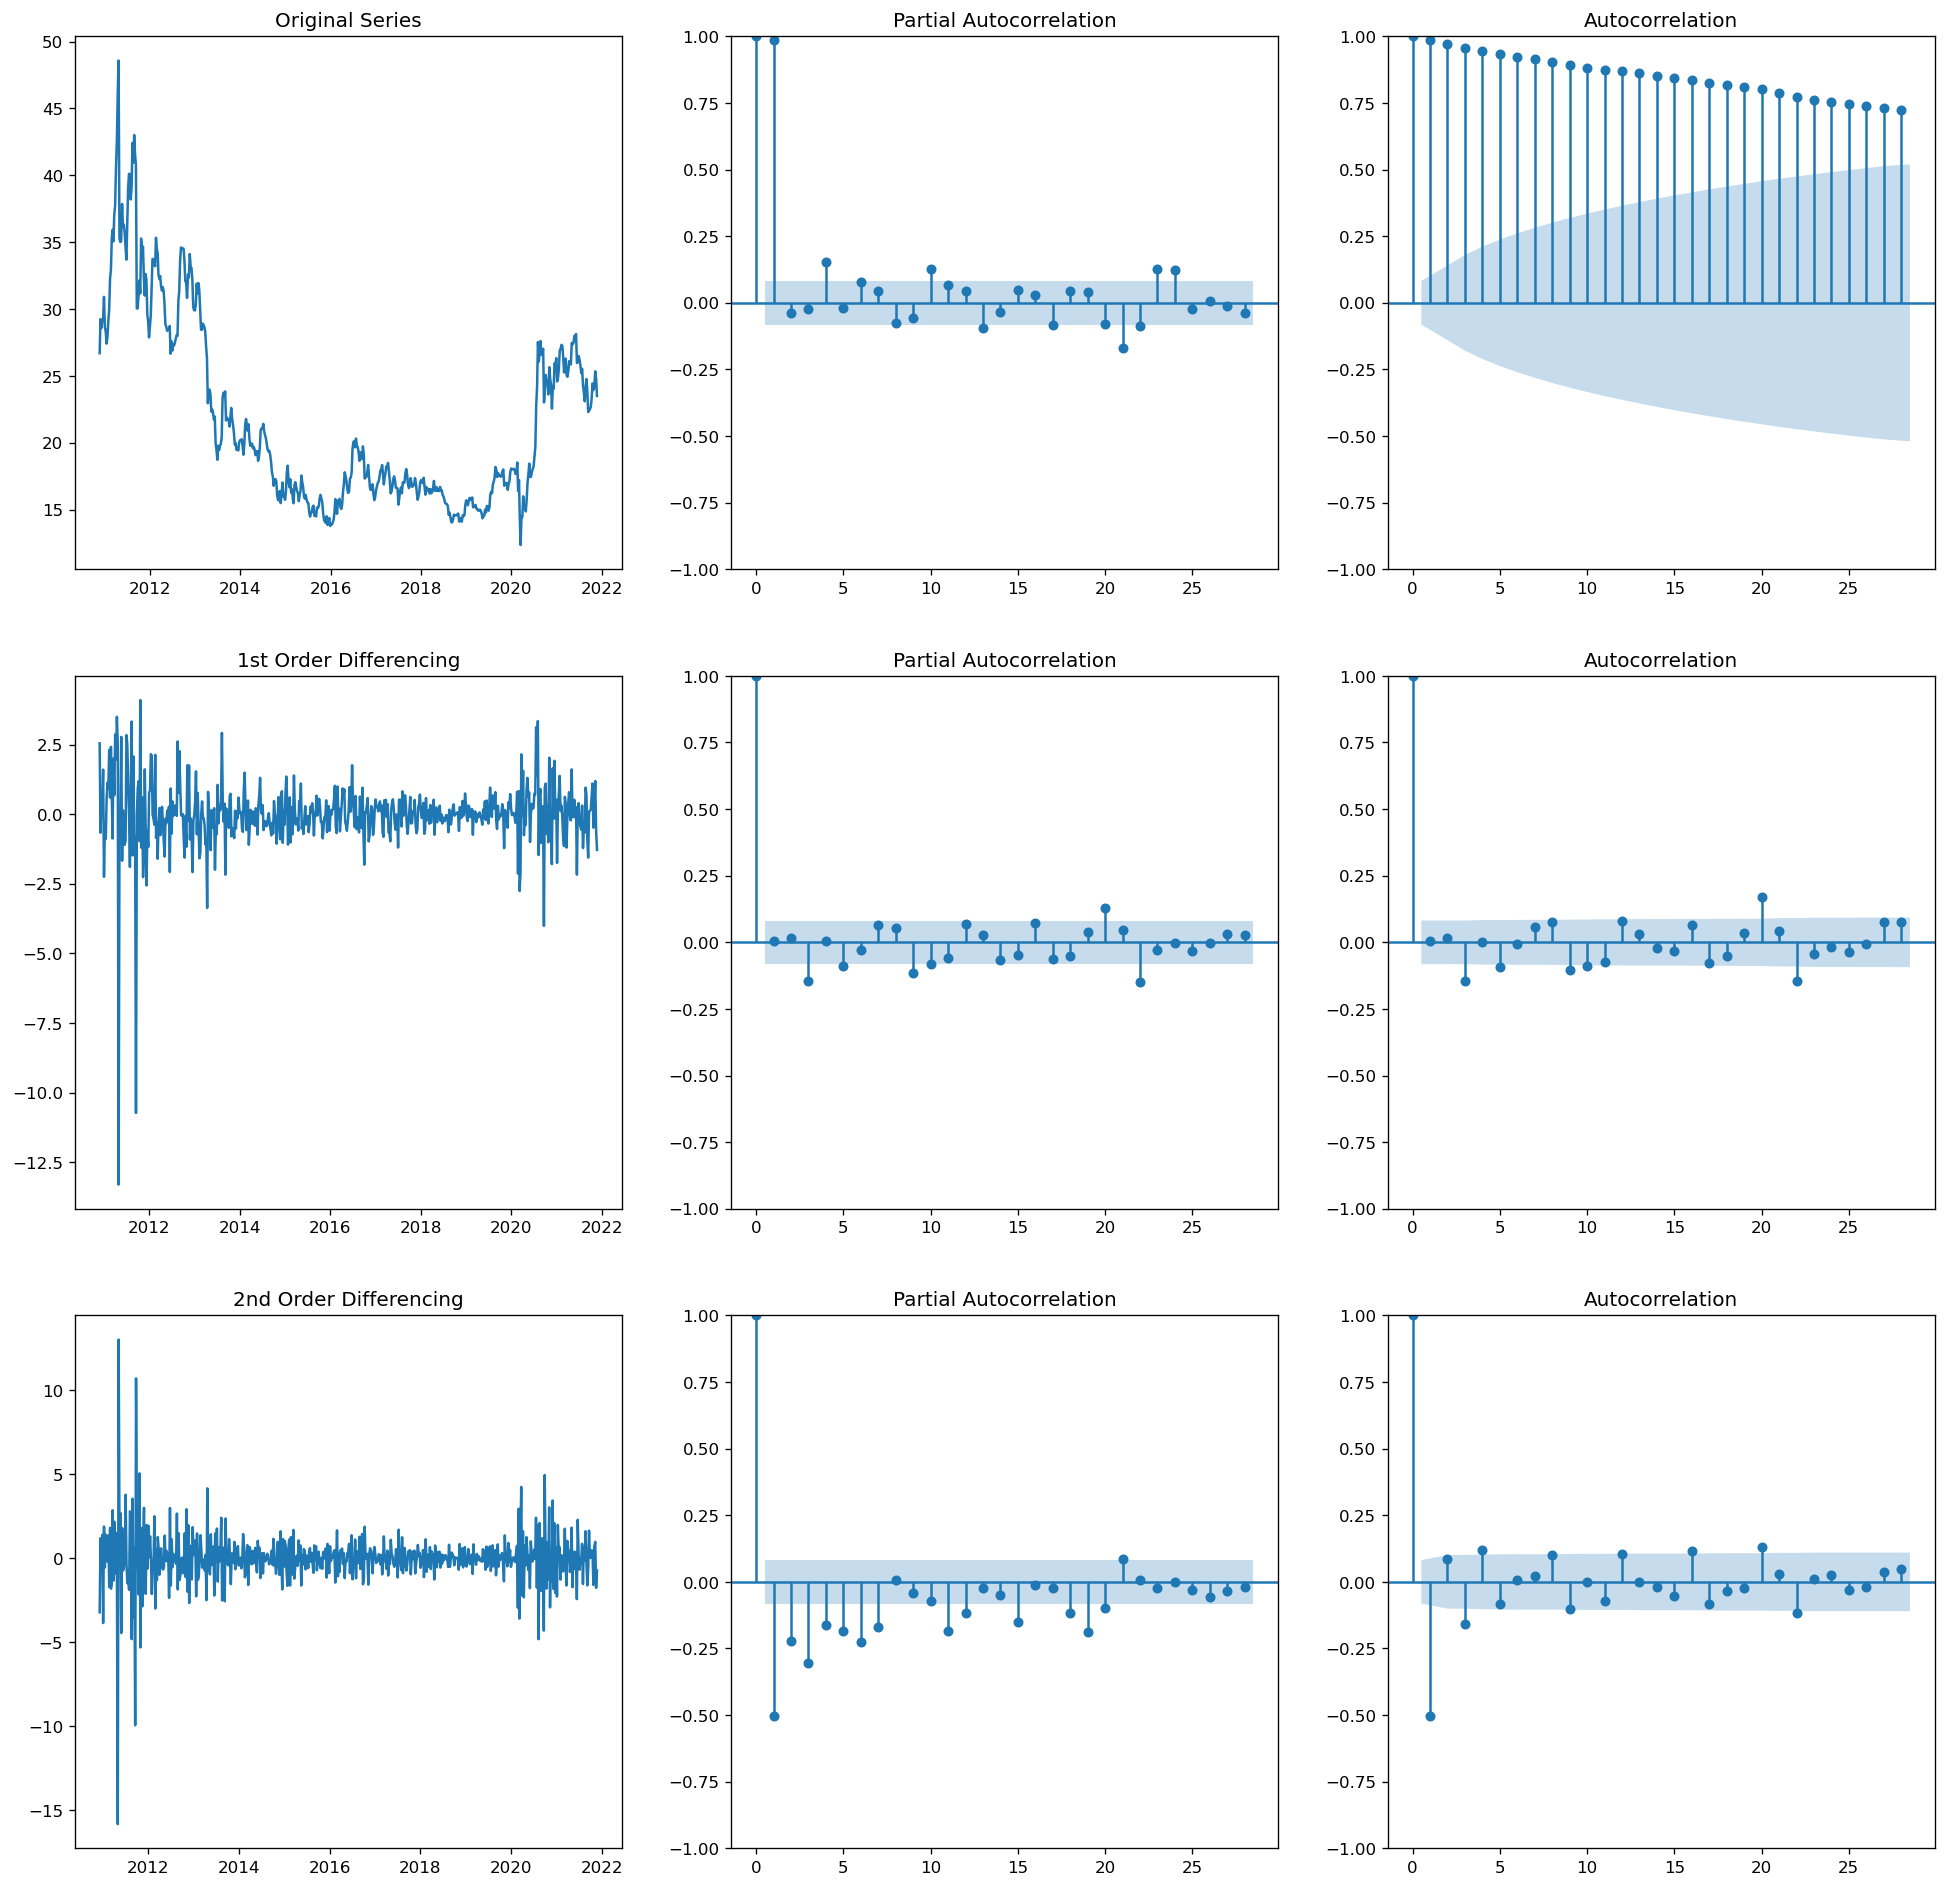

In [22]:
plt.rcParams.update({'figure.figsize':(20,20), 'figure.dpi':120})

# Original Series
fig, axes = plt.subplots(3, 3)
axes[0, 0].plot(sil_df['Close*']); axes[0, 0].set_title('Original Series')
plot_pacf(sil_df['Close*'], ax=axes[0, 1])
plot_acf(sil_df['Close*'], ax=axes[0, 2])

# 1st Differencing
axes[1, 0].plot(sil_df['Close*'].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_pacf(sil_df['Close*'].diff().dropna(), ax=axes[1, 1])
plot_acf(sil_df['Close*'].diff().dropna(), ax=axes[1, 2])
# 2nd Differencing
axes[2, 0].plot(sil_df['Close*'].diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_pacf(sil_df['Close*'].diff().diff().dropna(), ax=axes[2, 1])
plot_acf(sil_df['Close*'].diff().diff().dropna(), ax=axes[2, 2])

plt.show()

__Observation__

__d__ For the above series, the time series reaches stationarity with two orders of differencing. But on looking at the autocorrelation plot for the 2nd differencing the lag goes into the far negative zone fairly quick, which indicates, the series might have been over differenced.

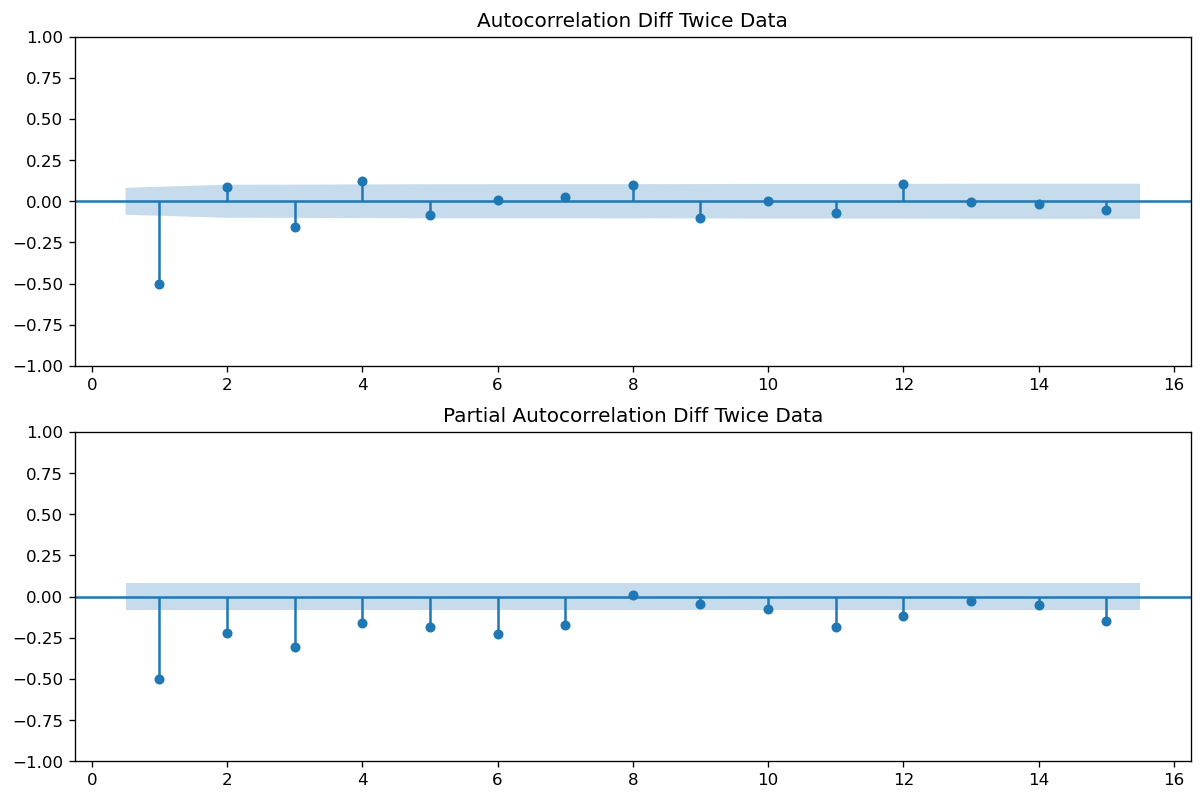

In [23]:
# Plot ACF and PACF with stationary data using data that was differenced twice

fig_difftwice, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))

# Plot ACF of data_difftwice
plot_acf(sil_difftwice['Close*'], lags=15, zero=False, ax=ax1, title='Autocorrelation Diff Twice Data')

# Plot PACF of data_difftwice
plot_pacf(sil_difftwice['Close*'], lags=15, zero=False, ax=ax2, title='Partial Autocorrelation Diff Twice Data')

plt.show()


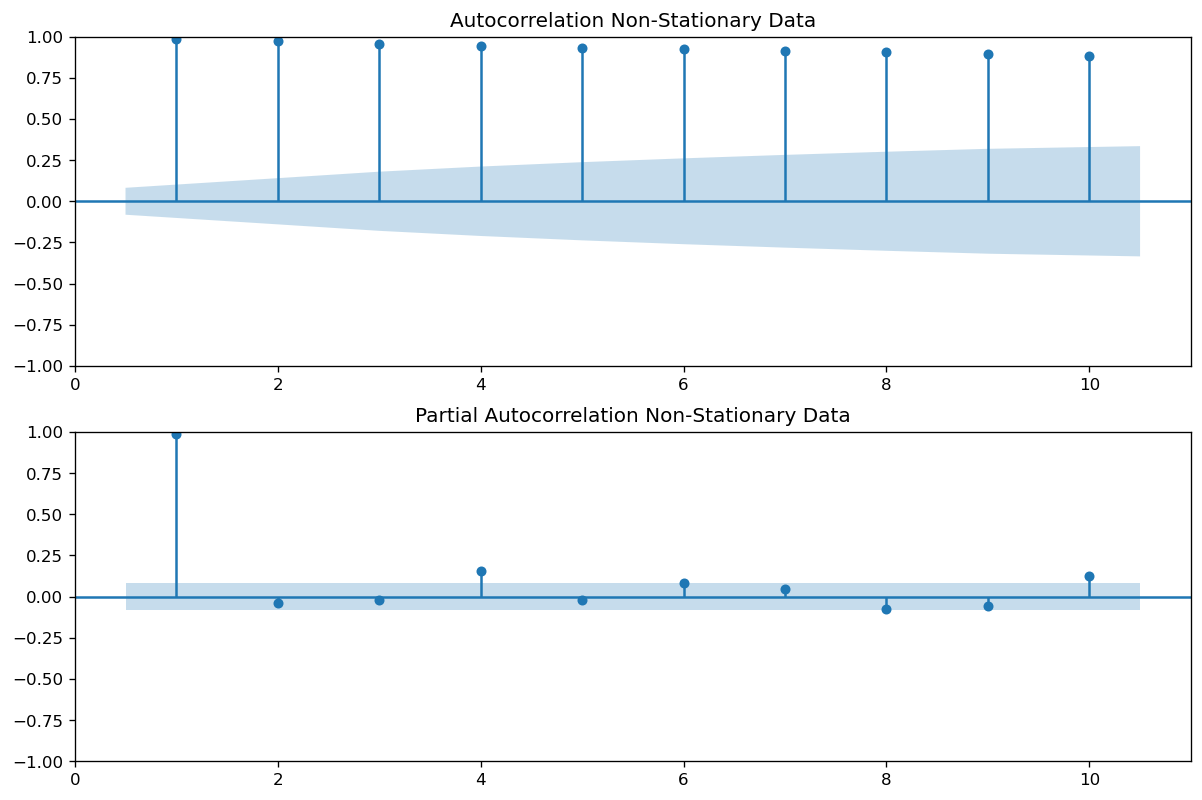

In [24]:
# Plot ACF and PACF with non-stationary data just to see how different they are compared to the stationary data

fig_sil_df, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))

# Plot ACF of data_difftwice
plot_acf(sil_df['Close*'], lags=10, zero=False, ax=ax1, title='Autocorrelation Non-Stationary Data')

# Plot PACF of data_difftwice
plot_pacf(sil_df['Close*'], lags=10, zero=False, ax=ax2, title='Partial Autocorrelation Non-Stationary Data')

plt.show()

__Observation__

The ACF cuts off after lag 1 and the PACF tails off. This may indicate that a Moving Average Model with an order of 1 MA(1) might be the best. However, there are limitations to the ACF and PACF method. We are making the judgement based on how the ACF and PACF graphs look. Sometimes it may not be as clear to make a conclusion. 


#### Chosing the model order using the auto_arima function

The important parameters of the function are:

The time-series to which you fit the ARIMA model.
start_p: the starting value of p, the order of the auto-regressive (AR) model. This must be a positive integer.
start_q: the starting value of q, the order of the moving-average (MA) model. This must be a positive integer.
d: the order of first-differencing. The default setting is none, and then the value is selected automatically based on the results of the test, in this case the Augmented Dickey-Fuller test.
test: type of unit root test to use in order to detect stationarity if stationary is False and d is none.

Which Model - AR, MA or ARMA. Use AIC and BIC Results to Pick the Optimal Model Order¶
Akaike Information Criterion (AIC)

Lower AIC indicates a better model
AIC is ideal for simple models with lower order
Bayesian Information Criterion (BIC)

Lower BIC indicates a better model
BIC penalizes complex models
Most of the times, AIC and BIC will select the same model order. However, when they don't, we have to make a choice which to pick:

AIC - better at choosing predictive models (use this if that’s our goal)
BIC - better at choosing good explanatory model (use this if that’s our goal)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1795.467, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1797.448, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1797.449, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1793.480, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1799.445, Time=0.11 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.228 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  575
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -895.740
Date:                Mon, 06 Dec 2021   AIC                           1793.480
Time:                        21:32:01   BIC                           1797.833
Sample:                             0   HQIC                          1795.178
                                - 575                                       

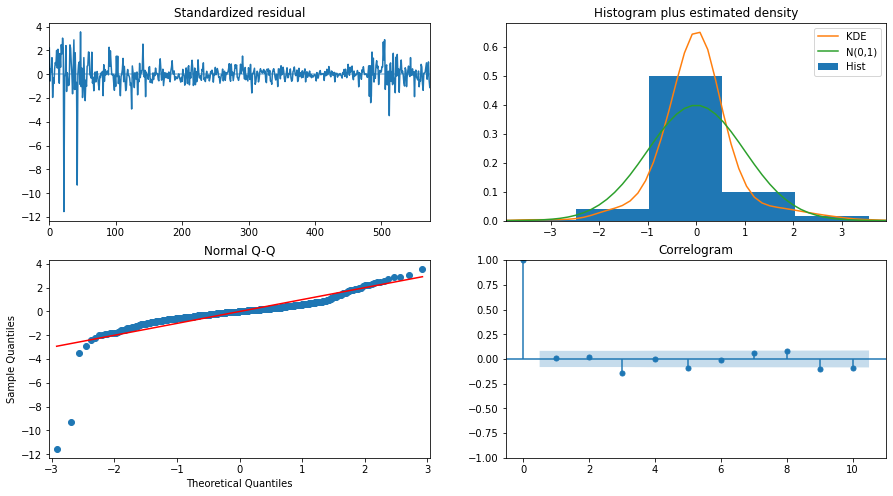

In [34]:
model_autoARIMA = auto_arima(sil_df['Close*'], start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=4,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

__Observation__
Our Best model from auto ARIMA model is (0,1,0)
The auto_arima functions tests the time series with different combinations of p, d, and q using AIC as the criterion. AIC stands for Akaike Information Criterion, which estimates the relative amount of information lost by a given model. In simple terms, a lower AIC value is preferred. In the above output, the lowest AIC value of 1361.322 was obtained for the ARIMA(0, 1, 0) model, and that is used as the final estimator.
Top left: The residual errors seem to fluctuate around a mean of zero and have a uniform variance.
Top Right: The density plot suggest normal distribution with mean zero.
Bottom left: All the dots should fall perfectly in line with the red line. Any significant deviations would imply the distribution is skewed.
Bottom Right: The Correlogram, aka, ACF plot shows the residual errors are not autocorrelated. Any autocorrelation would imply that there is some pattern in the residual errors which are not explained in the model. So you will need to look for more X’s (predictors) to the model.

Overall, it seems to be a good fit. Let’s start forecasting the stock prices.

Next, create an ARIMA model with provided optimal parameters p, d and q.

### Train-Test split

In [243]:
train_data = sil_df.loc[:'2018-12-03']
test_data = sil_df.loc['2018-12-03':]

In [244]:
print(train_data)

            Close*
Date              
2010-11-22  26.695
2010-11-29  29.241
2010-12-06  28.576
2010-12-13  29.113
2010-12-20  29.310
...            ...
2018-11-05  14.103
2018-11-12  14.358
2018-11-19  14.221
2018-11-26  14.094
2018-12-03  14.572

[420 rows x 1 columns]


In [245]:
print(test_data)

            Close*
Date              
2018-12-03  14.572
2018-12-10  14.513
2018-12-17  14.583
2018-12-24  15.326
2018-12-31  15.695
...            ...
2021-10-24  23.945
2021-10-31  24.152
2021-11-08  25.344
2021-11-15  24.780
2021-11-22  23.496

[156 rows x 1 columns]


In [246]:
train_data.shape

(420, 1)

In [118]:
test_data.shape

(156, 1)

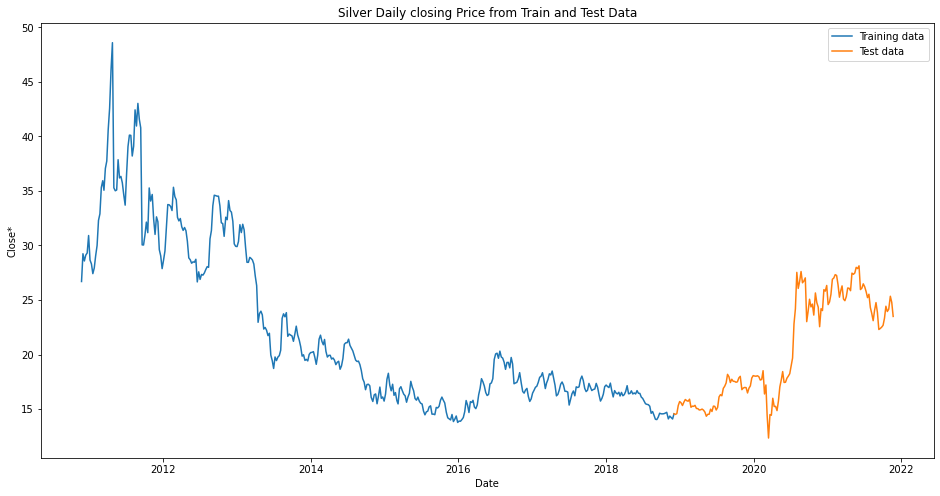

In [119]:
# Plot the test and train data
plt.figure(figsize=(16,8))
sns.lineplot(x=train_data.index, y='Close*', data=train_data, linewidth=1.5, label='Training data').set_title('Silver Daily closing Price from Train and Test Data')
sns.lineplot(x=test_data.index, y='Close*', data=test_data, linewidth=1.5, label='Test data')
plt.show()

The next step is to make predictions on the test data, which is done using the code below. The second line prints the first five observations

__Arima Model__

In [120]:
# Fit a model
model = SARIMAX(train_data['Close*'], order=(0,1,0), trend= 'c')
results = model.fit()

__Arima prediction over the last year (52 weeks) of the train data__

In [121]:
# Make predictions for the last 365 days of the train data
# start=-52 weeks ~ a year, we want to start the prediction from one year back (52 Weeks)
pred_52_traindata = results.get_prediction(start=-52, dynamic=False)

# Forecast mean for these 52 weeks
pred_mean_52_traindata = pred_52_traindata.predicted_mean

# Get confidence intervals of forecast
confidence_intervals = pred_52_traindata.conf_int()

# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower Close*']
upper_limits = confidence_intervals.loc[:,'upper Close*']

In [122]:
# Convert pred_mean_52_traindata series to a dataframe
# Inspect pred_mean_52_traindata_df
pred_mean_52_traindata_df = pred_mean_52_traindata.to_frame(name='forecasted_mean')
pred_mean_52_traindata_df.head()

,forecasted_mean
Date,
2017-12-11,15.707067
2017-12-18,15.949067
2017-12-25,16.328067
2018-01-01,17.031067
2018-01-08,17.176067


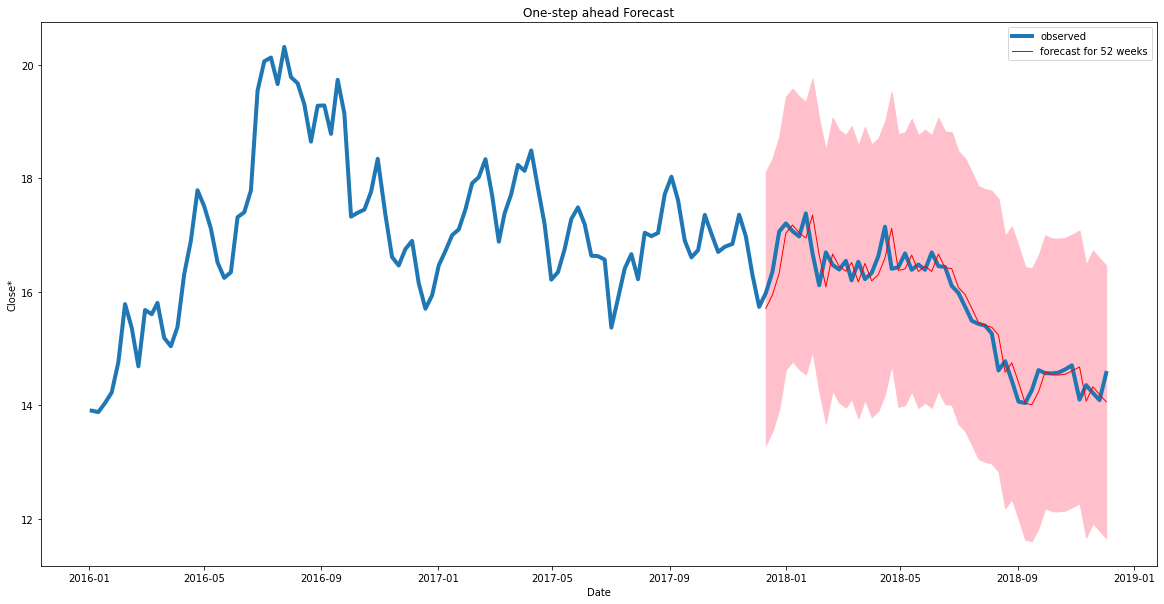

In [123]:
# Plot the original training data - Zoom in starting from 2016
plt.figure(figsize=(20,10))
sns.lineplot(x=train_data['2016-01-01 00:00:00':].index, y='Close*', data=train_data['2016-01-01 00:00:00':], linewidth=4, label='observed').set_title('One-step ahead Forecast')

# Plot the mean predictions for the last 52 weeks of training data
sns.lineplot(x=pred_mean_52_traindata_df.index, y=pred_mean_52_traindata_df['forecasted_mean'], data=pred_mean_52_traindata_df, linewidth=1, label='forecast for 52 weeks', color='red')

# Shade the area between the confidence intervals
plt.fill_between(lower_limits.index, lower_limits, upper_limits, color='pink')

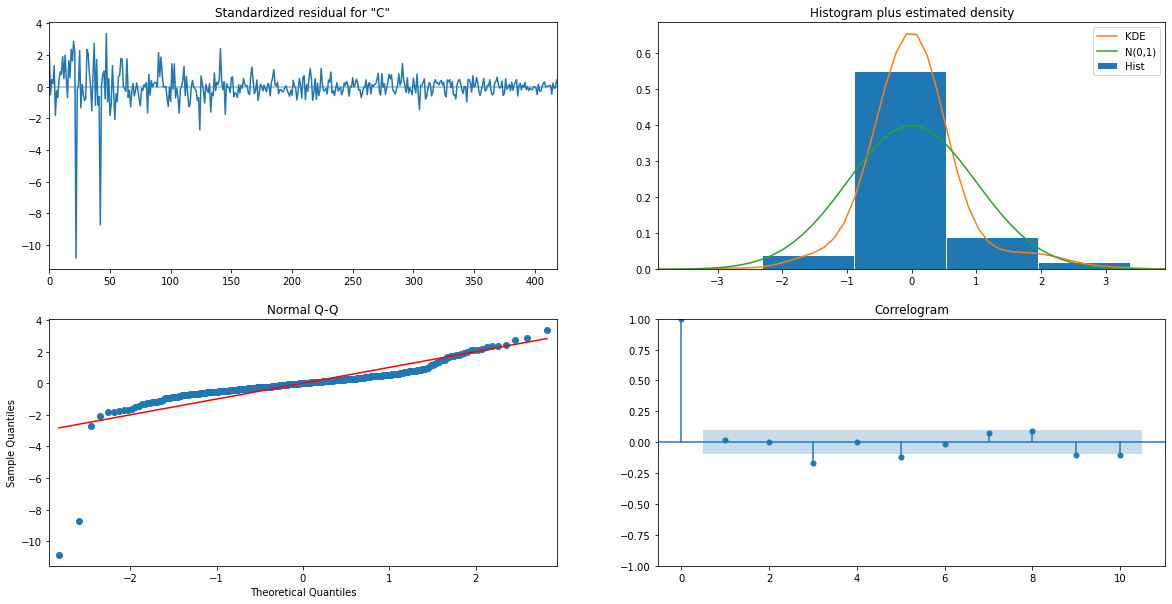

In [124]:
# Method 1: Model Diagnostics
# Evaluate the quality of the model before using it for forecasting in production
results.plot_diagnostics()
plt.show()

In [125]:
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                 Close*   No. Observations:                  420
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -679.544
Date:                Tue, 07 Dec 2021   AIC                           1363.088
Time:                        12:24:08   BIC                           1371.164
Sample:                             0   HQIC                          1366.280
                                - 420                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0289      0.076     -0.381      0.703      -0.178       0.120
sigma2         1.5005      0.027     55.663      0.000       1.448       1.553
Ljung-Box (L1) (Q):                   0.19   Jarque-

Method 1 Conclusion: ARIMA Model with No Seasonality 

Analysis of Diagnostic Results

Real vs Forecated Value Plot
the predicted values are align with the real values and the predicted values fall within the confidence interval
Analysis from the 4 Diagnostic Plots

Standardized Residual Plot - The graph doesn't seem to show a trend. That's what we want.

Historgram Plus Estimated Density - This shows the distribution of the residuals. The green line shows a normal distribution and the orange line needs to be as close to the green line. The 2 lines are very different in this case. This model might need tweaking.

Normal Q-Q - This shows how the distribution of the residuals compares to a normal distribution. Most of the residuals are on the line except the ends.

Correlogram - ACF plot of the residuals. 95% of the data where lag > 0 should not be significant. That means, they need to be within the blue shaded area. Based on the graph, it looks OK as 95% of the data is not significant, they are within the blue shaded area.

Analysis from Summary Results
Ljung-Box - the null hypothesis states there are no correlations in the residual. If Prob(Q) <= 0.05, then we have to reject the null hypothesis and refit the model. In this case, it's 0.66

Jarque-Bera - the null hypothesis states the residual are normally distributed. If Prob(JB) <= 0.05, then we have to reject the null hypothesis and refit the model. In this case, it's 0.



__Forecasting over the length of test data__

In [126]:
# Forecasting out of the sample. 
arima_forecast = results.get_forecast(steps=len(test_data))

# Forecast mean
arima_forecast = arima_forecast.predicted_mean

# Get confidence intervals of forecast
# Assign it the same index at test data
# arima_forecasted_confidence_intervals = arima_forecast.conf_int()
arima_forecasted_confidence_intervals.index = test_data.index #need to do this in order to plot


# Select lower and upper confidence limits
arima_forecasted_lower_limits = arima_forecasted_confidence_intervals.loc[:,'lower Close*']
arima_forecasted_upper_limits = arima_forecasted_confidence_intervals.loc[:,'upper Close*']

# Convert auto_arima_mean_forecast to a dataframe
# Inspect auto_arima_mean_forecast
arima_mean_forecast_df = arima_mean_forecast.to_frame(name='forecasted_mean')
arima_mean_forecast_df.index = test_data.index
arima_mean_forecast_df.head()

,forecasted_mean
Date,
2018-12-03,14.543067
2018-12-10,14.514134
2018-12-17,14.485200
2018-12-24,14.456267
2018-12-31,14.427334


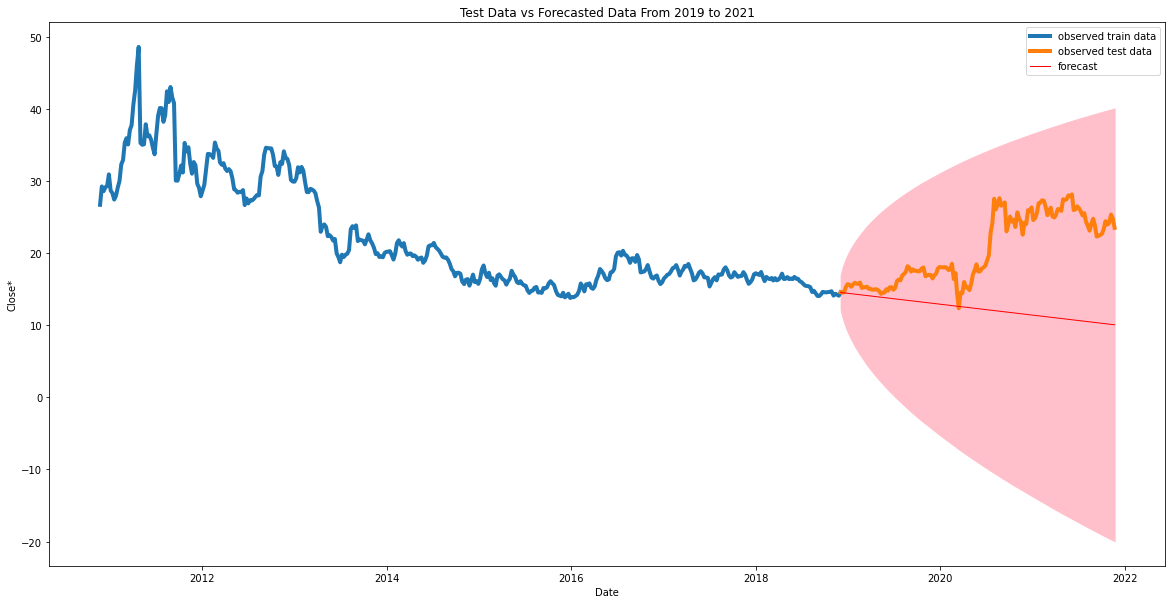

In [86]:
# Plot the forecasted data set against the test data
plt.figure(figsize=(20,10))

# Plot the train data
sns.lineplot(x=train_data.index, y='Close*', data=train_data, linewidth=4, label='observed train data').set_title('Test Data vs Forecasted Data From 2019 to 2021')

# Plot the test data
sns.lineplot(x=test_data.index, y='Close*', data=test_data, linewidth=4, label='observed test data')

# Plot the forecast data
sns.lineplot(x=arima_mean_forecast_df.index, y=arima_mean_forecast_df['forecasted_mean'], data=arima_mean_forecast_df, linewidth=1, label='forecast', color='red')

# Shade the area between the confidence intervals
plt.fill_between(arima_forecasted_lower_limits.index, arima_forecasted_lower_limits, arima_forecasted_upper_limits, color='pink')

__MAE, MSE, RMSE Metrics__

The MSE, MAE, RMSE metrics are mainly used to evaluate the prediction error rates and model performance in regression analysis.

__MAE (Mean absolute error)__ represents the difference between the original and predicted values extracted by averaged the absolute difference over the data set.

__MSE (Mean Squared Error)__ represents the difference between the original and predicted values extracted by squared the average difference over the data set.

__RMSE (Root Mean Squared Error)__ is the error rate by the square root of MSE.


In [87]:
# Calculate MAE, MSE, RMSE
real_test_values = test_data['Close*']

# Calculate MAE, MSE, RMSE
print('MAE: {}'.format(mean_absolute_error(real_test_values, arima_mean_forecast)))
print('MSE: {}'.format(mean_squared_error(real_test_values, arima_mean_forecast)))
print('RMSE: {}'.format(np.sqrt(mean_squared_error(real_test_values, arima_mean_forecast))))

MAE: 8.109576968973748
MSE: 99.80350882411733
RMSE: 9.990170610360833


__Arima method Test__

In [66]:
train_data, test_data = sil_df[0:int(len(sil_df)*0.7)], sil_df[int(len(sil_df)*0.7):]
training_data = train_data['Close*'].values
test_data = test_data['Close*'].values
history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)
for time_point in range(N_test_observations):
    model = ARIMA(history, order=(0,1,0))
#     model_fit = model.fit(disp=0)
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)
MSE_error = mean_squared_error(test_data, model_predictions)
print('Testing Mean Squared Error is {}'.format(MSE_error))

Testing Mean Squared Error is 0.7771598265895959


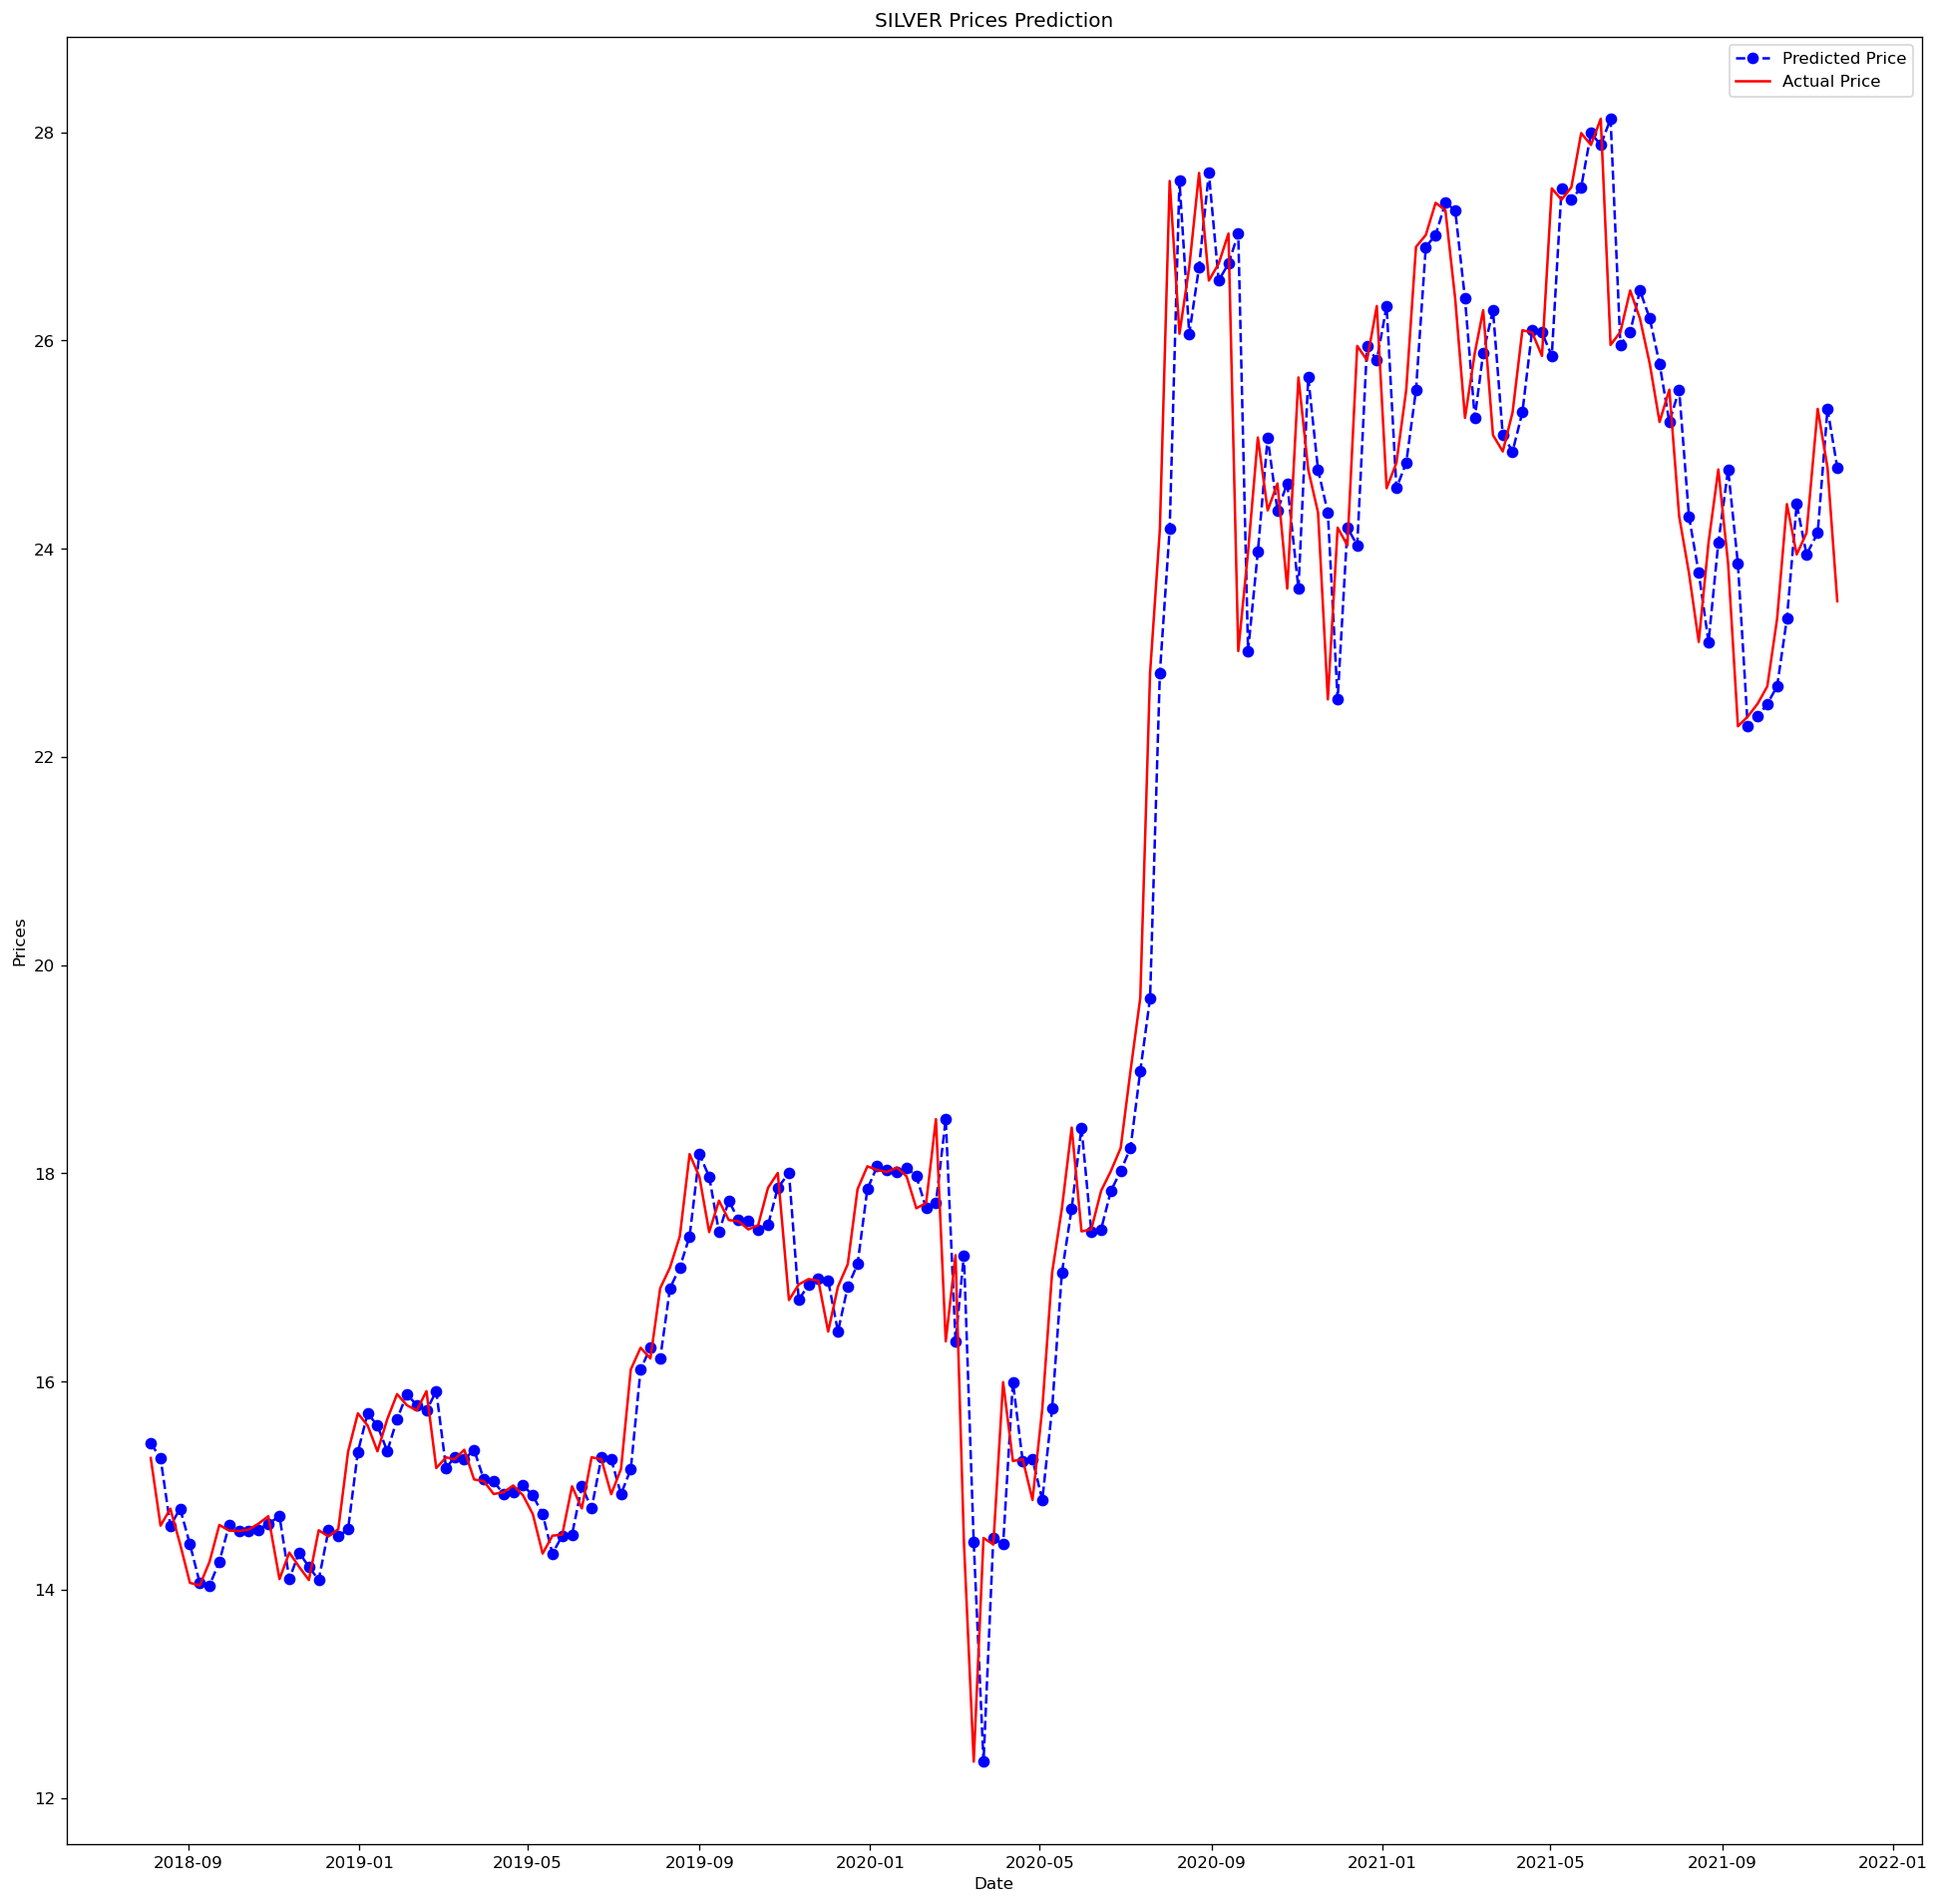

In [67]:
test_set_range = sil_df[int(len(sil_df)*0.7):].index
plt.plot(test_set_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(test_set_range, test_data, color='red', label='Actual Price')
plt.title('SILVER Prices Prediction')
plt.xlabel('Date')
plt.ylabel('Prices')
# plt.xticks(np.arange(881,1259,50), df.Date[881:1259:50])
plt.legend()
plt.show()

# Sarima Model

Seasonal ARIMA, is an extension of ARIMA that explicitly supports univariate time series data with a seasonal component. It adds three new hyperparameters to specify the autoregression (AR), differencing (I) and moving average (MA) for the seasonal component of the series, as well as an additional parameter for the period of the seasonality.

There are four seasonal elements that are not part of ARIMA that must be configured; they are:

P: Seasonal autoregressive order.

D: Seasonal difference order.

Q: Seasonal moving average order.

m: The number of time steps for a single seasonal period.

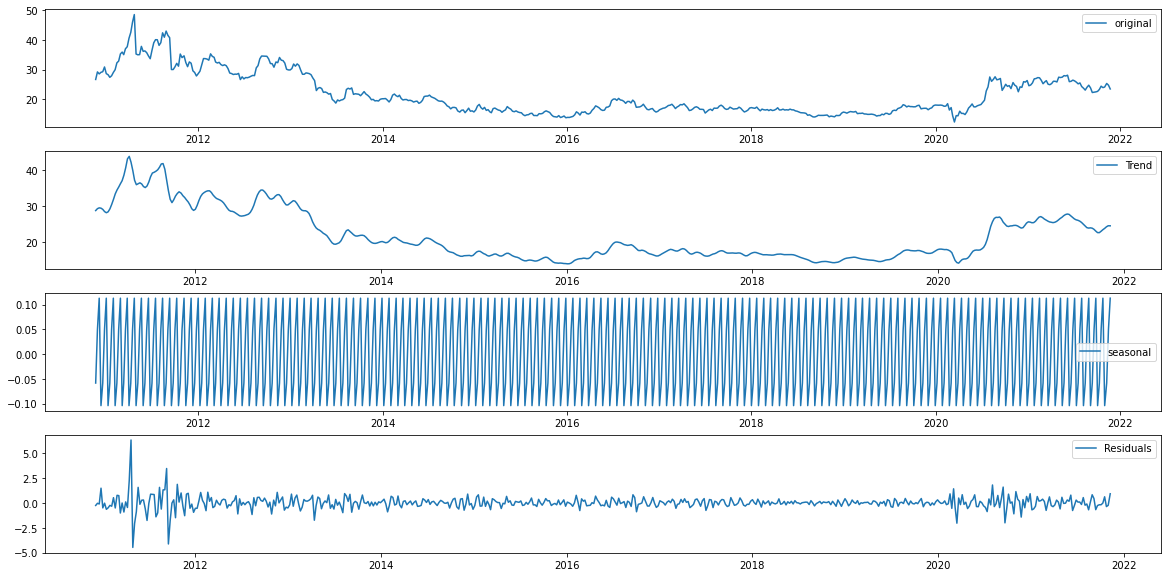

In [70]:
# Import seasonal_decompose 
from statsmodels.tsa.seasonal import seasonal_decompose

# Make a variable called decomposition, and assign it y passed to seasonal_decompose() 
decomposition = seasonal_decompose(sil_df['Close*'], model='additive', period=4)

# Make three variables for trend, seasonal and residual components respectively. 
# Assign them the relevant features of decomposition 
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot the original data, the trend, the seasonality, and the residuals 
plt.subplot(411)
plt.plot(y, label = 'original')
plt.legend(loc = 'best')
plt.subplot(412)
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')
plt.subplot(413)
plt.plot(seasonal, label = 'seasonal')
plt.legend(loc = 'best')
plt.subplot(414)
plt.plot(residual, label = 'Residuals')
plt.legend(loc = 'best')

### Model order selection 

Let's run auto_arima() function to get best p,d,q,P,D,Q values

#### Using pm.auto_arima

In [71]:
y = sil_df['Close*']

In [45]:
import pmdarima as pm
# Seasonal - fit stepwise auto-ARIMA
smodel = pm.auto_arima(y, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=4,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[4] intercept   : AIC=1787.611, Time=0.25 sec
 ARIMA(0,0,0)(0,1,0)[4] intercept   : AIC=2548.147, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[4] intercept   : AIC=1938.476, Time=0.11 sec
 ARIMA(0,0,1)(0,1,1)[4] intercept   : AIC=2136.744, Time=0.12 sec
 ARIMA(0,0,0)(0,1,0)[4]             : AIC=2546.234, Time=0.01 sec
 ARIMA(1,0,1)(0,1,0)[4] intercept   : AIC=2071.680, Time=0.09 sec
 ARIMA(1,0,1)(1,1,1)[4] intercept   : AIC=1787.640, Time=0.40 sec
 ARIMA(1,0,1)(0,1,2)[4] intercept   : AIC=1787.682, Time=0.51 sec
 ARIMA(1,0,1)(1,1,0)[4] intercept   : AIC=1929.460, Time=0.12 sec
 ARIMA(1,0,1)(1,1,2)[4] intercept   : AIC=1789.626, Time=0.92 sec
 ARIMA(1,0,0)(0,1,1)[4] intercept   : AIC=1786.430, Time=0.27 sec
 ARIMA(1,0,0)(0,1,0)[4] intercept   : AIC=2102.635, Time=0.05 sec
 ARIMA(1,0,0)(1,1,1)[4] intercept   : AIC=1785.989, Time=0.30 sec
 ARIMA(1,0,0)(2,1,1)[4] intercept   : AIC=1787.975, Time=0.53 sec
 ARIMA(1,0,0)(1,1,2)[4] intercept

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  575
Model:             SARIMAX(1, 0, 0)x(1, 1, [1], 4)   Log Likelihood                -888.093
Date:                             Mon, 06 Dec 2021   AIC                           1784.185
Time:                                     21:34:24   BIC                           1801.575
Sample:                                          0   HQIC                          1790.970
                                             - 575                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9592      0.012     83.190      0.000       0.937       0.982
ar.S.L4       -0.0741      0.047     -1.563      0.118      -0.167       0.019
ma.S.L4       -0.9068      0.026    -35.270      0.000      -0.957      -0.856
sigma2         1.2977      0.033     39.258      0.000       1.233       1.363
===================================================================================
Ljung-Box (L1) (Q):                   0.29   Jarque-Bera (JB):             19831.68
Prob(Q):                              0.59   Prob(JB):                         0.00
Heteroskedasticity (H):               0.26   Skew:                            -2.58
Prob(H) (two-sided):                  0.00   Kurtosis:                        31.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [50]:
# model1 (2,1,2)(2,1,1,12)
# (1,0,0)(1,1,1)[4] 
# ARIMA(3,0,1)(2,1,0)[12] 
#ARIMA(2,0,2)(2,1,1)[7] 
# Best model:  ARIMA(0,1,0)(0,0,0)[0] 
# model1 (2,1,2)(2,1,1,12)
sarima_model1 =  SARIMAX(train_data['Close*'],  
                        order = (1,0,0),  
                        seasonal_order =(1, 1, 1, 4))
sarima_model1_results = sarima_model1.fit()

In [88]:
# Make predictions for the last 52 Weeks of the train data
# start=-52, we want to start the prediction from one year back (52 Weeks)
sarima1_pred_52_traindata =sarima_model1_results.get_prediction(start=-52, dynamic=False)

# Forecast mean for these 52 weeks
sarima1_pred_mean_52_traindata = sarima1_pred_52_traindata.predicted_mean

# Get confidence intervals of forecast
sarima1_confidence_intervals = sarima1_pred_52_traindata.conf_int()

# Select lower and upper confidence limits
lower_limits = sarima1_confidence_intervals.loc[:,'lower Close*']
upper_limits = sarima1_confidence_intervals.loc[:,'upper Close*']

In [58]:
# Convert sarima1_pred_mean_52_traindata series to a dataframe
# Convert sarima1_pred_mean_52_traindata series to a dataframe
# Inspect sarima1_pred_mean_52_traindata_df
sarima1_pred_mean_52_traindata_df = sarima1_pred_mean_52_traindata.to_frame(name='forecasted_mean')
sarima1_pred_mean_52_traindata_df.head()

,forecasted_mean
Date,
2017-12-11,15.680042
2017-12-18,15.949252
2017-12-25,16.488517
2018-01-01,17.115708
2018-01-08,17.142863


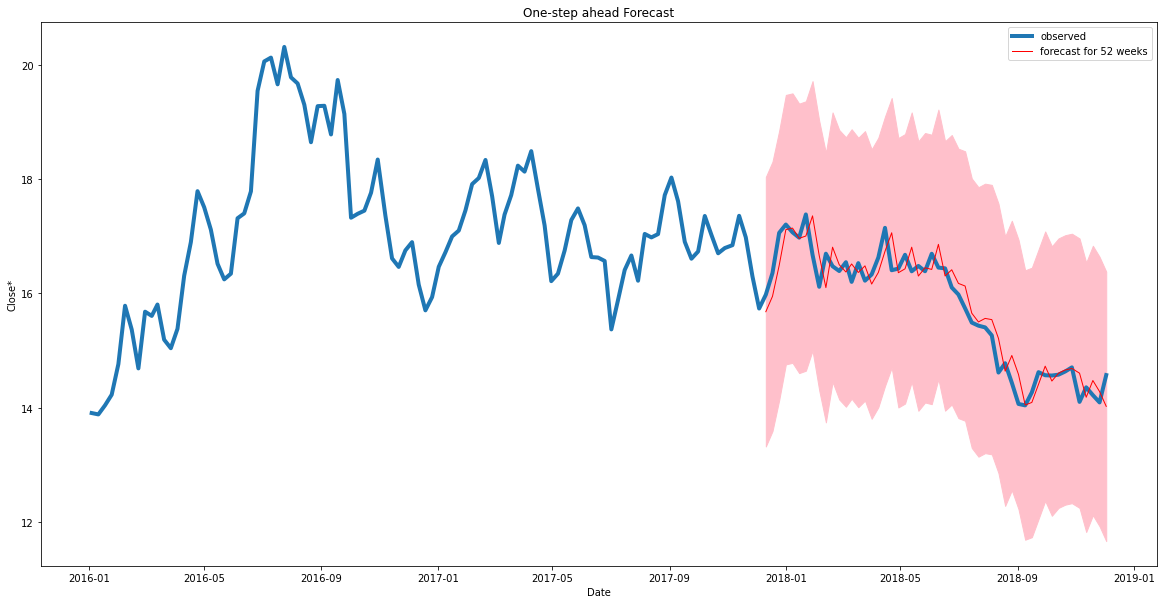

In [89]:
# Plot the original training data - Zoom in starting from 2016
plt.figure(figsize=(20,10))
sns.lineplot(x=train_data['2016-01-01 00:00:00':].index, y='Close*', data=train_data['2016-01-01 00:00:00':], linewidth=4, label='observed').set_title('One-step ahead Forecast')

# Plot the mean predictions for the last 52 weeks of training data
sns.lineplot(x=sarima1_pred_mean_52_traindata_df.index, y=sarima1_pred_mean_52_traindata_df['forecasted_mean'], data=sarima1_pred_mean_52_traindata_df, linewidth=1, label='forecast for 52 weeks', color='red')

# Shade the area between the confidence intervals
plt.fill_between(lower_limits.index, lower_limits, upper_limits, color='pink')

### Model Diagnostics

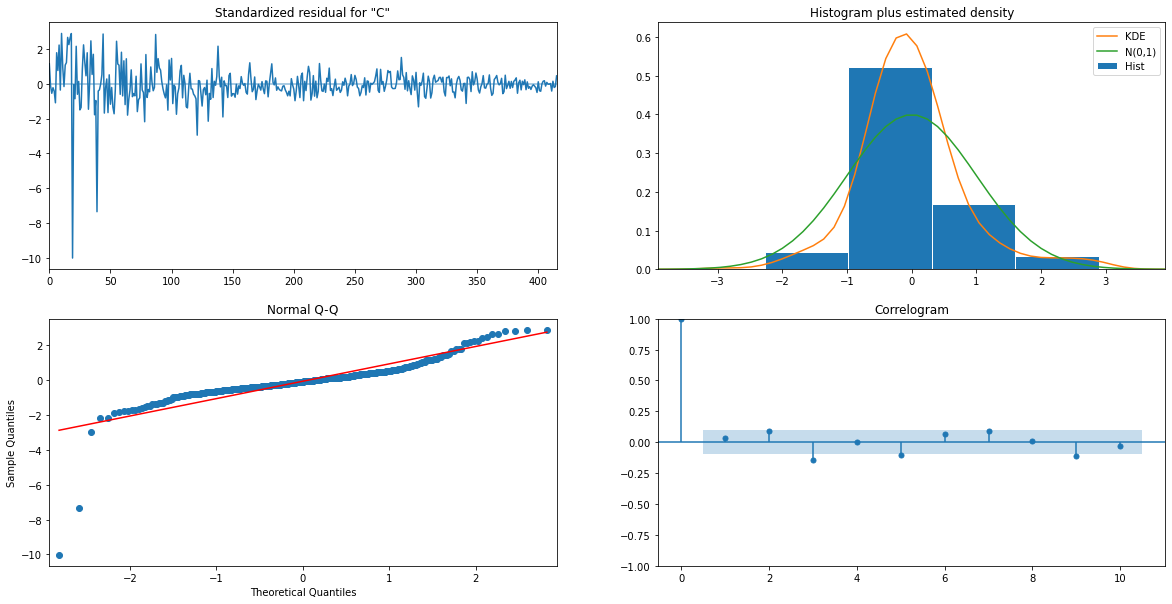

In [90]:
# Method 1: Model Diagnostics
# Evaluate the quality of the model before using it for forecasting in production
sarima_model1_results.plot_diagnostics()
plt.show()

In [61]:
print(sarima_model1_results.summary())

                                      SARIMAX Results                                      
Dep. Variable:                              Close*   No. Observations:                  420
Model:             SARIMAX(1, 0, 0)x(1, 1, [1], 4)   Log Likelihood                -670.199
Date:                             Mon, 06 Dec 2021   AIC                           1348.397
Time:                                     21:39:56   BIC                           1364.520
Sample:                                          0   HQIC                          1354.772
                                             - 420                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9500      0.014     67.290      0.000       0.922       0.978
ar.S.L4       -0.1009      

Forecast using Training Data and Compare with the Test Data

### Model Forecast

In [91]:
# Forecasting out of the sample. 
sarima1_forecast_test = sarima_model1_results.get_forecast(steps=len(test_data))

# Forecast mean
sarima1_mean_forecast = sarima1_forecast.predicted_mean

# Get confidence intervals of forecast
# Assign it the same index at test data
sarima1_forecasted_confidence_intervals = sarima1_forecast.conf_int()
sarima1_forecasted_confidence_intervals.index = test_data.index #need to do this in order to plot


# Select lower and upper confidence limits
sarima1_forecasted_lower_limits = sarima1_forecasted_confidence_intervals.loc[:,'lower Close*']
sarima1_forecasted_upper_limits = sarima1_forecasted_confidence_intervals.loc[:,'upper Close*']

# Convert auto_arima_mean_forecast to a dataframe
# Inspect auto_arima_mean_forecast
sarima1_mean_forecast_df = sarima1_mean_forecast.to_frame(name='forecasted_mean')
sarima1_mean_forecast_df.index = test_data.index
sarima1_mean_forecast_df.head()

,forecasted_mean
Date,
2018-12-03,14.627317
2018-12-10,14.724093
2018-12-17,14.762363
2018-12-24,14.616777
2018-12-31,14.687628


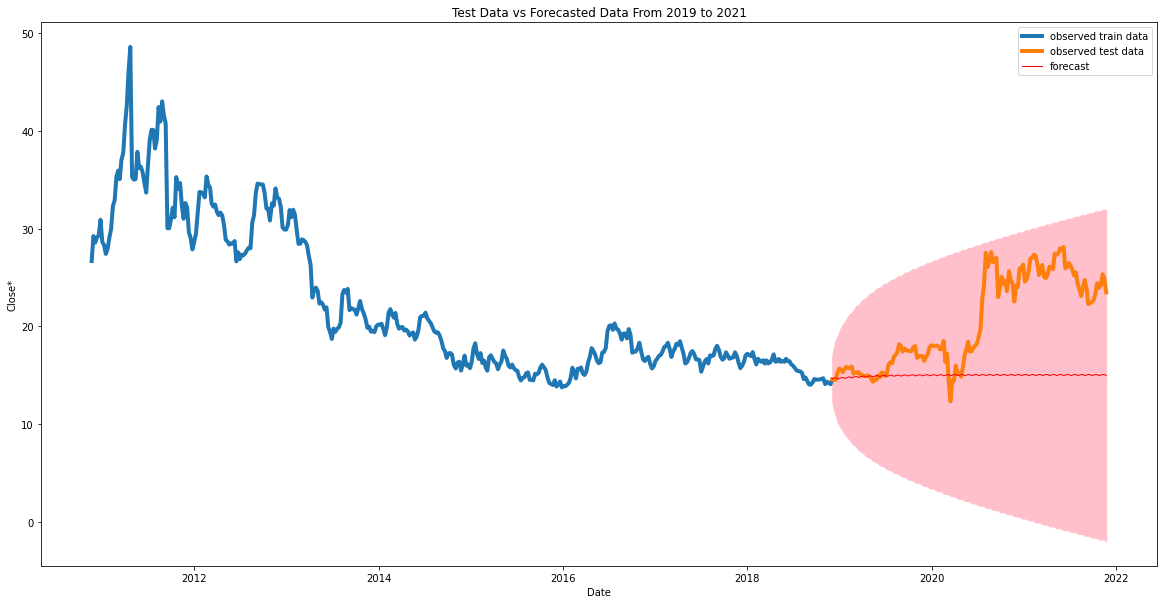

In [92]:
# Plot the forecasted data set against the test data
plt.figure(figsize=(20,10))

# Plot the train data
sns.lineplot(x=train_data.index, y='Close*', data=train_data, linewidth=4, label='observed train data').set_title('Test Data vs Forecasted Data From 2019 to 2021')

# Plot the test data
sns.lineplot(x=test_data.index, y='Close*', data=test_data, linewidth=4, label='observed test data')

# Plot the forecast data
sns.lineplot(x=sarima1_mean_forecast_df.index, y=sarima1_mean_forecast_df['forecasted_mean'], data=sarima1_mean_forecast_df, linewidth=1, label='forecast', color='red')

# Shade the area between the confidence intervals
plt.fill_between(sarima1_forecasted_lower_limits.index, sarima1_forecasted_lower_limits, sarima1_forecasted_upper_limits, color='pink')

### Model Accuracy metrics

In [93]:
# Calculate MAE, MSE, RMSE
real_test_values = test_data['Close*']

# Calculate MAE, MSE, RMSE
print('MAE: {}'.format(mean_absolute_error(real_test_values, sarima1_mean_forecast)))
print('MSE: {}'.format(mean_squared_error(real_test_values, sarima1_mean_forecast)))
print('RMSE: {}'.format(np.sqrt(mean_squared_error(real_test_values, sarima1_mean_forecast))))

MAE: 5.5018432174175
MSE: 50.816042620453786
RMSE: 7.128537200608116


# Conclusion

 
This project focused on SILVER weekly commodity pricing forecasting. The goal for this project is to understand and apply ARIMA, SARIMA time-series models in forecasting the price of silver.
By looking at the plot of the Arima Model we can observe a downward trend in the forecast window which is not aligned with the trend of the test data.
The Sarima model, which is the Arima Model that includes seasonality, shows an improved forecast although not the correct trend which is upward. The accuracy metrics confirm that the Sarima Model is more accurate.
The results show the necessity of future work that would include other modeling tools such as Facebook prophet and LSTM.

